In [2]:
# Import the load_digits function from the sklearn.datasets module
from sklearn.datasets import load_digits

# Load the digits dataset, which contains images of handwritten digits
digits = load_digits()

# Check the shape of the 'images' attribute of the dataset, which contains the image data
# The shape represents the dimensions of the image data, where the first dimension is the number of images,
# the second dimension is the number of rows in each image, and the third dimension is the number of columns in each image
images_shape = digits.images.shape

# Print the shape to the console
print(images_shape)

(1797, 8, 8)


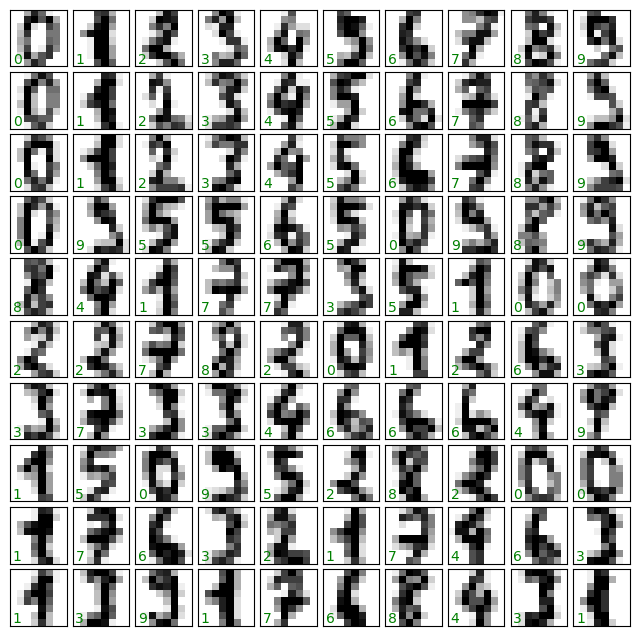

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                     subplot_kw={'xticks':[], 'yticks':[]},
                                     gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(digits.target[i]),
                        transform=ax.transAxes, color='green')

In [7]:
X = digits.data
y = digits.target

## Unsupervised learning: Dimensionality reduction


In [9]:
# Import the Isomap class from scikit-learn's manifold module
from sklearn.manifold import Isomap

# Create an Isomap instance with 2 components
iso = Isomap(n_components=2)

# Fit the Isomap model to the data
iso.fit(digits.data)

# Transform the data into a lower-dimensional space using the fitted model
data_projected = iso.transform(digits.data)

# Check the shape of the transformed data
data_projected.shape


/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

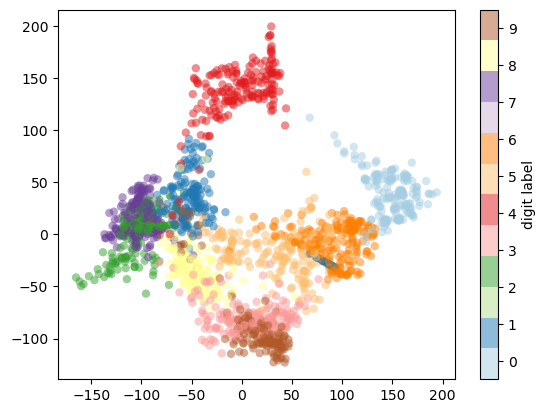

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of the transformed data
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap='Paired')  # Updated colormap name

# Add a colorbar to label digit labels
plt.colorbar(label='digit label', ticks=range(10))

# Set color limits for the colorbar
plt.clim(-0.5, 9.5)

# Show the plot
plt.show()


## Classification

In [29]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X is the feature data, and y is the target labels
# random_state is set for reproducibility
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

# Import the Gaussian Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes model
model = GaussianNB()

# Train (fit) the model on the training data
model.fit(Xtrain, ytrain)

# Use the trained model to make predictions on the test data
y_model = model.predict(Xtest)


In [31]:
# Import the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
# by comparing the true labels (ytest) with the predicted labels (y_model)
accuracy_score(ytest, y_model)


0.8555555555555555

Text(113.9222222222222, 0.5, 'True Value')

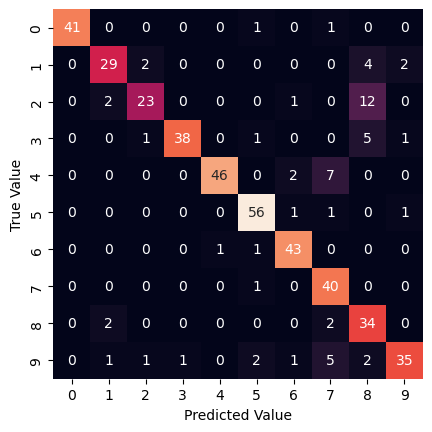

In [32]:
# Import the confusion_matrix function from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix by comparing the true labels (ytest) with the predicted labels (y_model)
mat = confusion_matrix(ytest, y_model)

# Import the Seaborn library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
# - 'square=True' makes the heatmap a square shape
# - 'annot=True' displays the values in each cell
# - 'cbar=False' removes the colorbar
sns.heatmap(mat, square=True, annot=True, cbar=False)

# Set labels for the x-axis and y-axis
plt.xlabel('Predicted Value')
plt.ylabel('True Value')


In [47]:
# Import the XGBoost library
import xgboost as xgb

# Create an instance of the XGBoost classifier model
model = xgb.XGBClassifier(
    learning_rate=0.1,  # Learning rate (controls step size during training)
    max_depth=3,        # Maximum depth of the tree
    n_estimators=100,   # Number of boosting rounds (trees)
    random_state=42     # Random seed for reproducibility
)

# Train (fit) the XGBoost model on the training data
model.fit(Xtrain, ytrain)

# Use the trained model to make predictions on the test data
y_pred = model.predict(Xtest)

# Import the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
# by comparing the true labels (ytest) with the predicted labels (y_pred)
accuracy = accuracy_score(ytest, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.5f}')


Accuracy: 0.96889


Text(113.9222222222222, 0.5, 'True Value')

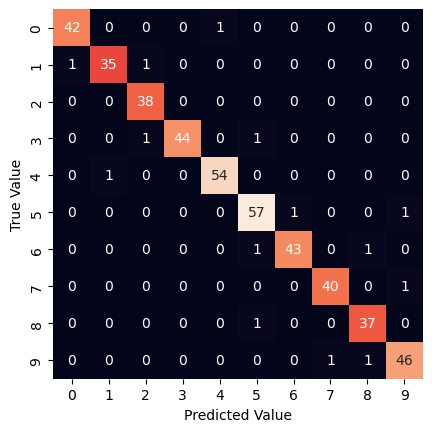

In [40]:
mat = confusion_matrix(ytest, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)

# Set labels for the x-axis and y-axis
plt.xlabel('Predicted Value')
plt.ylabel('True Value')


## GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.4, 0.5, 0.6],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500]
}
model = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 500}

In [57]:
model = xgb.XGBClassifier(
    learning_rate=0.2,  # Learning rate (controls step size during training)
    max_depth=6,        # Maximum depth of the tree
    n_estimators=500,   # Number of boosting rounds (trees)
    random_state=42     # Random seed for reproducibility
)

# Train (fit) the XGBoost model on the training data
model.fit(Xtrain, ytrain)

# Use the trained model to make predictions on the test data
y_pred = model.predict(Xtest)

# Import the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
# by comparing the true labels (ytest) with the predicted labels (y_pred)
accuracy = accuracy_score(ytest, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.97111


In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.93333333, 0.90277778, 0.94150418, 0.93871866, 0.88579387])